Importation des librairie Keras
Génération des données avec un peu de bruit 


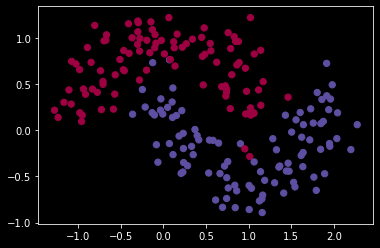

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

# 1 - Generation d'un jeu de donnees

np.random.seed(3)
# Jeu de donnees obtenu avec make_blobs
#X,y=datasets.make_blobs(n_samples=200,centers=2)
# Jeu de donnees obtenu avec make_moons
X,y=datasets.make_moons(200,noise=0.20)
plt.style.use('dark_background')
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)

Division en train et en ensembles de test.
Création d'un modèle de classification linéaire sur des données d'etrainement X
Affichage des données de prédiction

Epoch 1/10
150/150 [==============================] - 0s 1ms/step - loss: 0.6339 - acc: 0.3467
Epoch 2/10
150/150 [==============================] - 0s 736us/step - loss: 0.1492 - acc: 0.7467
Epoch 3/10
150/150 [==============================] - 0s 735us/step - loss: 0.1098 - acc: 0.8333
Epoch 4/10
150/150 [==============================] - 0s 782us/step - loss: 0.1015 - acc: 0.8533
Epoch 5/10
150/150 [==============================] - 0s 768us/step - loss: 0.0962 - acc: 0.8533
Epoch 6/10
150/150 [==============================] - 0s 771us/step - loss: 0.0939 - acc: 0.8600
Epoch 7/10
150/150 [==============================] - 0s 761us/step - loss: 0.0934 - acc: 0.8800
Epoch 8/10
150/150 [==============================] - 0s 751us/step - loss: 0.0933 - acc: 0.8733
Epoch 9/10
150/150 [==============================] - 0s 778us/step - loss: 0.0930 - acc: 0.8867
Epoch 10/10
50/50 [==============================] - 0s 989us/step


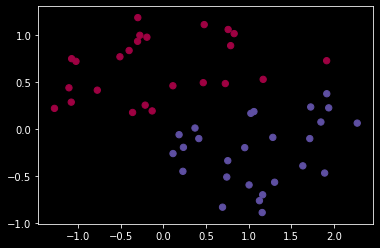

In [0]:
# 2 - Splitting en training set et testing set
# => training set
x_train = X[:150]
y_train = y[:150]
# => testing set
x_test = X[150:]
y_test = y[150:]

# 3 - Perceptron avec Keras
model = Sequential()
model.add(Dense(1, input_dim=2, activation='linear'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', 
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=10,
          batch_size=1)
score = model.evaluate(x_test, y_test, batch_size=1)

# 4 - y predit par le perceptron pour x_test

prediction=model.predict(x_test,batch_size=1)
error=0.0
for i in range(len(x_test)):
  if prediction[i]>=0.5:
    prediction[i]=1
  else:
    prediction[i]=0
  l=prediction[i]-y_test[i]
  error += l**2

y = [y for p in prediction for y in p]

plt.style.use('dark_background')
plt.scatter(x_test[:,0],x_test[:,1],s=40,c=y,cmap=plt.cm.Spectral)

Ici, on affiche notre fonction plot_decision_boundary et lui faire utiliser une carte de couleurs divergente, pour faire apparaitre les différentes classification du set.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8e6041d978>)

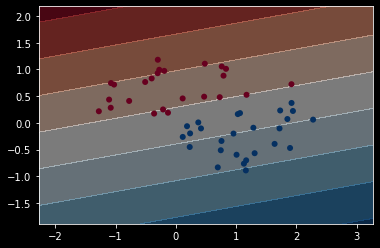

In [0]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

plot_decision_boundary(x_test,y,model,cmap='RdBu')
